## Ultimate Technologies Inc. Take-Home Challenge

Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

In [94]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

### Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [40]:
#load logins
df=pd.read_json("logins.json")

#number of logs
df.shape

(93142, 1)

In [42]:
#Aggregate  logins  based on 15 minutes time intervals
df["login_time"]=df["login_time"].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,15*(dt.minute // 15)))

#Add columns for year, month, dayof year, weekday, and hour
df["date"]=pd.to_datetime(df["login_time"].dt.date)
df["year"]=df["login_time"].dt.year
df["week"]=df["login_time"].dt.week
df["weekday"]=df["login_time"].dt.dayofweek
df["hour"]=df["login_time"].dt.hour
df["minute"]=df["login_time"].dt.minute

#display aggregated dataframe
df.head()

,login_time,date,year,week,weekday,hour,minute
0,1970-01-01 20:00:00,1970-01-01,1970,1,3,20,0
1,1970-01-01 20:15:00,1970-01-01,1970,1,3,20,15
2,1970-01-01 20:15:00,1970-01-01,1970,1,3,20,15
3,1970-01-01 20:15:00,1970-01-01,1970,1,3,20,15
4,1970-01-01 20:15:00,1970-01-01,1970,1,3,20,15


In [55]:
daily_logs=df.groupby("date").size()
daily_logs=daily_logs.reset_index().rename(columns={0: "logs_count"})
daily_logs["week"]=daily_logs["date"].dt.week

In [74]:
daily_logs=df.groupby(["date","weekday"]).size().reset_index()

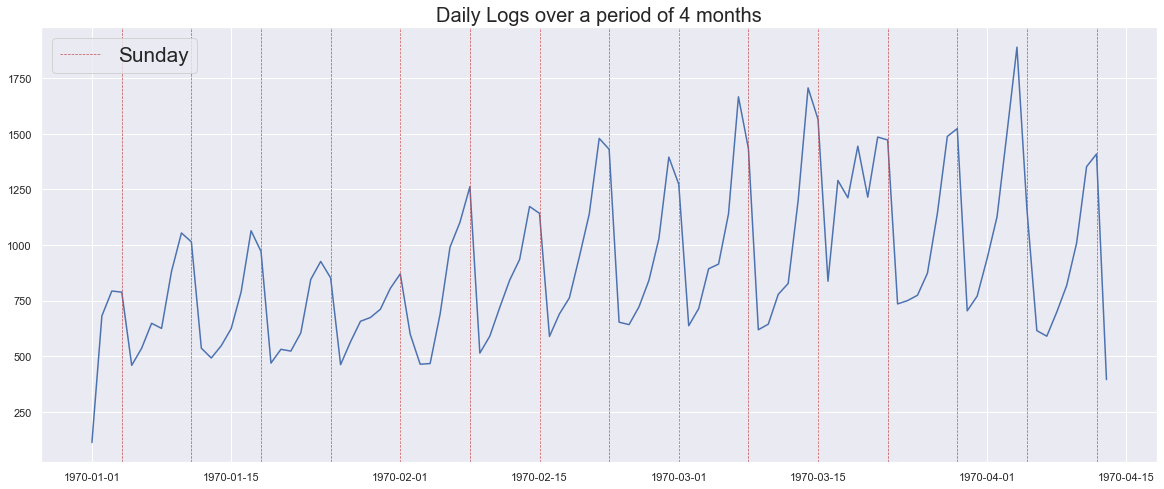

In [107]:
#Plot daily logs

fig,ax=plt.subplots(figsize=(20,8))
ax.plot(daily_logs["date"],daily_logs[0]);
sundays=daily_logs[daily_logs["weekday"]==6]["date"]

for xc in sundays[:1]:
    ax.axvline(x=xc,linestyle= "--",linewidth=0.7, color="r",label="Sunday")

for xc in sundays[1:]:
    ax.axvline(x=xc,linestyle= "--",linewidth=0.7, color="r")
    
plt.title("Daily Logs over a period of 4 months",fontsize=20)
plt.legend(fontsize="xx-large");

There is clearly a weekly cycle in the number of logs. The number of logs is highest on saturdays and sundays and lowest on mondays. The number of logs also shows a global trend with a gradual increase over time. Let us Zoom in on a Typical Week

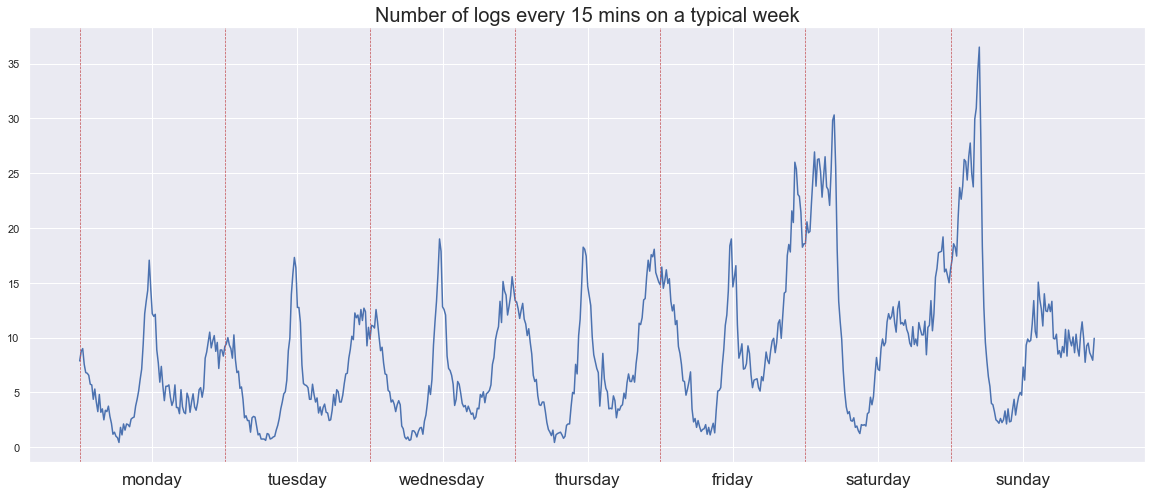

In [191]:
#Aggregate number of logs over weekdays
typical_week=(df.groupby(["weekday","hour","minute"]).size()/16).reset_index().rename(columns={0 : "logs_count"})


#Plot typical week
fig,ax=plt.subplots(figsize=(20,8));
ax.plot(typical_week["logs_count"]);


days=[96*i for i in range(7)]

for xc in days:
    ax.axvline(x=xc,linestyle= "--",linewidth=0.7, color="r",)
    

plt.xticks(np.array(days)+48,["monday","tuesday","wednesday","thursday","friday","saturday","sunday"],fontsize=17);

plt.title("Number of logs every 15 mins on a typical week",fontsize=20);


The number of logs is very similar from monday to thursday, then increases abruptly during the night from friday to saturday, and finally peaks on sunday night. We also observe a daily cycle : number of logs appears to peak two times daily. Lets us now zoom in on a typical day

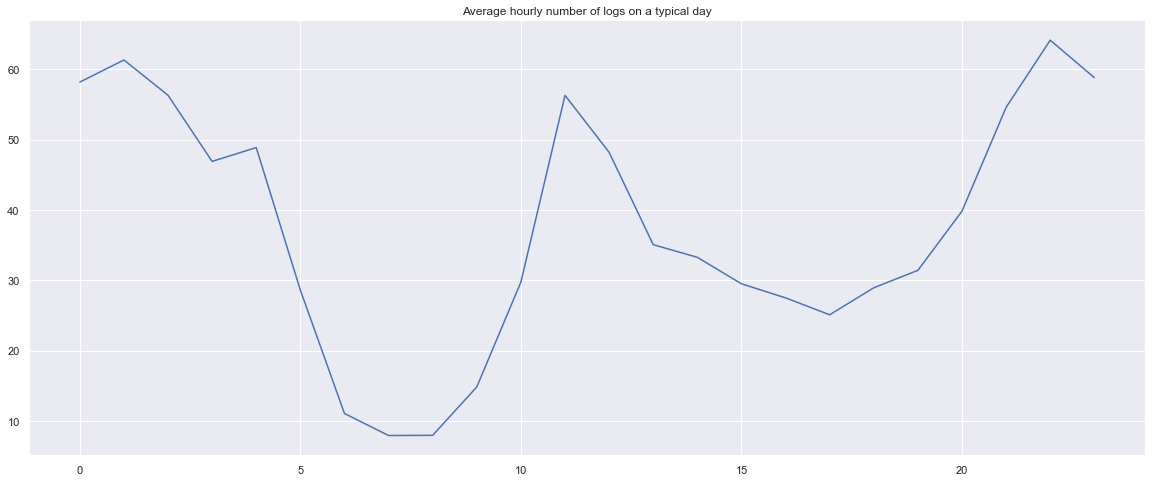

In [210]:
plt.subplots(figsize=(20,8))
plt.plot((df.groupby(["hour"]).size()/len(df["date"].unique())).reset_index()[0]);
plt.title("Average hourly number of logs on a typical day");

As suggested above, the number of logs peaks 2 times a day, at around 12am and 11pm, with lulls at 5-10 am and 3-7 pm

### Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: 
on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. 
On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a twoway toll, between the two cities causes driver partners to
tend to be exclusive to each city. The Ultimate managers of city operations for the two cities 
have proposed an experiment to encourage driver partners to be available in both cities,
by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

__Answer :__

If the data is available, i.e the company is able to track the user's rides, I would simply use the total number of times driver partners have crossed the bridge : if this measure is significantly higher when all toll costs are reimbursed, this would imply that drivers are less exclusive when they don't have to pay a toll. 

2. Describe a practical experiment you would design to
compare the effectiveness of the proposed change in relation to the key measure of success.
Please provide details on:
    
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

__Answer :__

Implement a t-test on the following hypothesis : 

Null hypothesis  H0 : mu, the mean difference between the number of times drivers cross the bridge when the toll is reimbursed (population 1) and the number of times drivers cross the bridge when it is not reimbursed (population 2), is equal to zero on week-ends. 

Make sure the measures are comparable, ie mu would be equal to zero if the toll was not reimbursed either when measuring the number of bridge crosses for population 1. 

H1 : mu > 0 

Then, if mu is high enough, recommend to the city to remove the toll permanently











### Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

In [369]:
#load logins
df=pd.read_json("ultimate_data_challenge.json")

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [372]:
#convert ultimate_black_user to ones and zeros
df["ultimate_black_user"]=df["ultimate_black_user"]*1

#Convert timestamp to timestamp
df["signup_date"]=pd.to_datetime(df["signup_date"])
#Convert date to timestamp
df["last_trip_date"]=pd.to_datetime(df["last_trip_date"])

In [373]:
# Check nan values
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

##### Dealing with missing values

Average rating of driver and average rating by driver are certainly important predictors. We drop the records where these are not known. Droping all nan values will retain more than 85% of oberved users

In [374]:
# drop nan
df=df.dropna()

In [375]:
#Check date of last recorded trips
df["last_trip_date"].sort_values(ascending=False)[:1]

31481   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

In [376]:
#Create target column : 0 if user was not retained, 1 if user was retained
df["retained"]=(df["last_trip_date"]>pd.Timestamp(2014, 6, 1))*1

df=df.drop("last_trip_date",axis=1)

In [377]:
df["retained"].sum()

16608

#### Deciding which features to keep in order to build our predictive model

We will discared the signup date. Intuitively, the day on which a user signed up does not have any impact on whether he/she will stay loyal

In [378]:
df=df.drop("signup_date",axis=1)

#### Does the number of trips in first 30 days have predicted power ? 

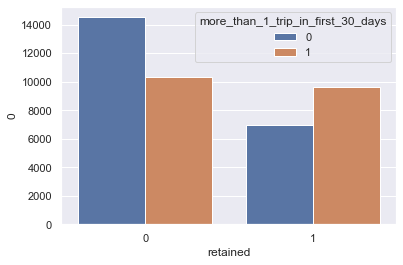

In [379]:
df2=df.copy()
df2["more_than_1_trip_in_first_30_days"]=(df2["trips_in_first_30_days"]>1)*1
more_than_one_trip=df2.groupby(["retained","more_than_1_trip_in_first_30_days"]).size().reset_index()
sns.barplot(x="retained",y=0,hue="more_than_1_trip_in_first_30_days",data=more_than_one_trip);

The above graph shows that the number of trips during first 30 days makes a difference

#### Normalize non categorical data

In [400]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_num = pd.DataFrame(min_max_scaler.fit_transform(df.drop(categorical,axis=1)),columns=df.drop(categorical,axis=1).columns)

#### Are there some highly correlated features ? 

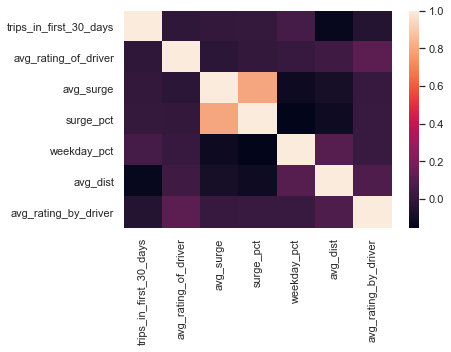

In [514]:
sns.heatmap(X_num.corr());

In [ ]:
### Let us drop one of the correlated features 



#### One hot encoding categorical variables

In [497]:
categorical=["city","phone","ultimate_black_user","retained"]
X_cat=pd.get_dummies(df[["city","phone","ultimate_black_user"]]).reset_index(drop=True)

In [498]:
X=pd.concat([X_num,X_cat],axis=1)
y=df["retained"]

#### Build a predictive model for user retention

We are most interest in the predictive power of each variable. Therefore we chose to train a XGB classifier on our data, which is able to give the list of relative feature importances

In [499]:
import sklearn
from sklearn.model_selection import train_test_split

In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [529]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [530]:
import xgboost as xgb
xgbmodel = xgb.XGBClassifier(
    n_estimators=30,
    reg_lambda=1,
    gamma=1,
    max_depth=5,
    seed=57)

xgbmodel.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=57,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=57,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Model Performance

In [535]:
y_test.mean()

0.4007559916358372

In [534]:
print(accuracy_score(xgbmodel.predict(X_test),y_test))
print(f1_score(xgbmodel.predict(X_test),y_test))

0.7900916840920058
0.73164713140037


Even if we take into account that the target data is slightly unbalanced (40/60), Our model performs reasonably well with almost 80% accuracy.

#### Feature importances

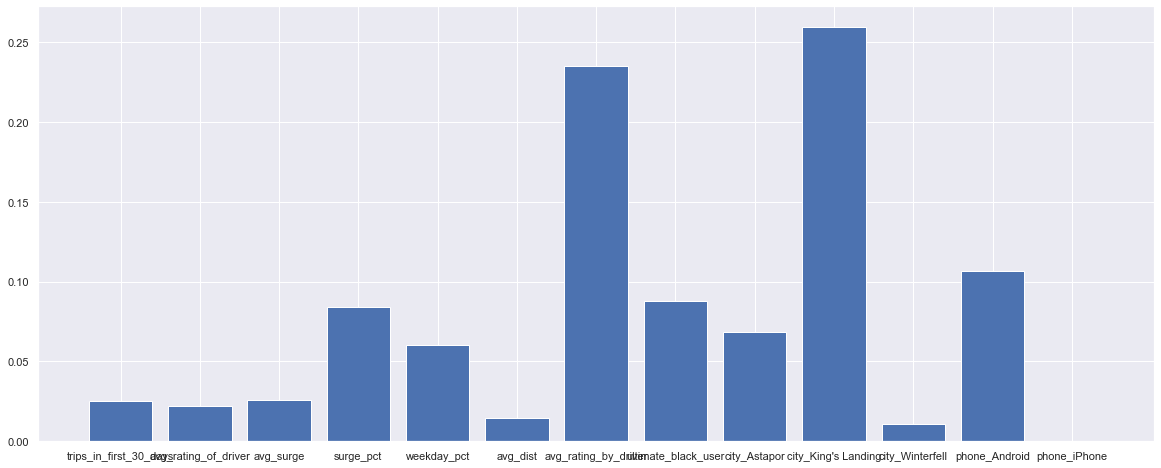

In [521]:
plt.subplots(figsize=(20,8))
plt.bar(X.columns, xgbmodel.feature_importances_);

#### Conclusion

It seems that the average rating by driver , the the city in which the driver is located , and whether the user uses an Android or Iphone play a major role in user retention.
I would therefore suggest to Ultimate Inc to investigate the causes on why users in some cities are more satisfied than in other cities. 
I would also suggest to focus their marketing campain on users with the type of phone who are more likely to continue the car service
